# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
from sklearn.metrics import roc_curve,auc, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix

__________________________________

# Data

In [3]:
data = pd.read_csv('data/data.csv')

In [4]:
data.head()

,Unnamed: 0,ID,sas_pred,TransactionID,xgboost_pred,isFraud
0,0,2987006,0.01276,2987006,0.009477,0
1,1,2987011,0.01111,2987011,0.011886,0
2,2,2987018,0.00869,2987018,0.003172,0
3,3,2987031,0.00848,2987031,0.006850,0
4,4,2987037,0.00825,2987037,0.002263,0


________________________________________________

# New Data
- create new columns based on models predicted scores

In [5]:
# creating new columns based on models predicted scores

data['sas_predicted'] = np.where(data['sas_pred'] >= .500000, 1, 0)
data['xgboost_predicted'] = np.where(data['xgboost_pred'] >= .500000, 1, 0)

In [6]:
data.head()

,Unnamed: 0,ID,sas_pred,TransactionID,xgboost_pred,isFraud,sas_predicted,xgboost_predicted
0,0,2987006,0.01276,2987006,0.009477,0,0,0
1,1,2987011,0.01111,2987011,0.011886,0,0,0
2,2,2987018,0.00869,2987018,0.003172,0,0,0
3,3,2987031,0.00848,2987031,0.006850,0,0,0
4,4,2987037,0.00825,2987037,0.002263,0,0,0


________________________________

# **Confusion Matrix**

In [7]:
#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# SAS

Confusion matrix, without normalization
[[34126    67]
 [  933   307]]
Normalized confusion matrix
[[0.99804053 0.00195947]
 [0.75241935 0.24758065]]


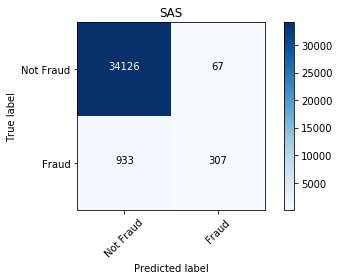

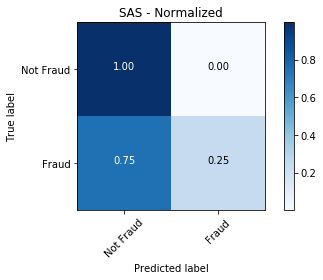

In [8]:
# Compute confusion matrix
sas_cnf_matrix = confusion_matrix(data.isFraud, data.sas_predicted)

# Sas matrix not normalized
plt.figure()
plot_confusion_matrix(sas_cnf_matrix, classes=['Not Fraud','Fraud'],
                      title='SAS')

# SAS matrix normalized
plt.figure()
plot_confusion_matrix(sas_cnf_matrix, normalize = True, classes=['Not Fraud','Fraud'],
                      title='SAS - Normalized')

# XG Boost

Confusion matrix, without normalization
[[34106    87]
 [  804   436]]
Normalized confusion matrix
[[0.99745562 0.00254438]
 [0.6483871  0.3516129 ]]


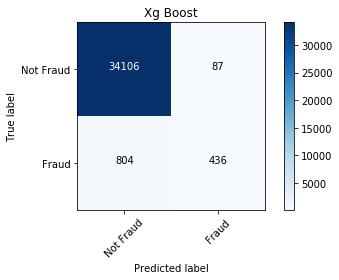

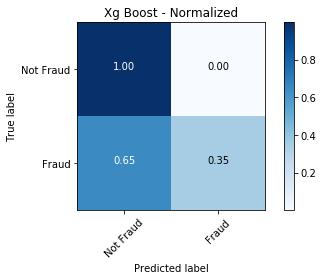

In [9]:
# Compute confusion matrix
xgb_cnf_matrix = confusion_matrix(data.isFraud, data.xgboost_predicted)
# Plot confusion matrix

plt.figure()
plot_confusion_matrix(xgb_cnf_matrix, classes=['Not Fraud','Fraud'],
                      title='Xg Boost')

plt.figure()
plot_confusion_matrix(xgb_cnf_matrix, normalize = True, classes=['Not Fraud','Fraud'],
                      title='Xg Boost - Normalized')

_____________________________________________

# **ROC Curve**

In [10]:
# from sklearn.metrics import roc_curve,auc, roc_auc_score, classification_report
# from sklearn.metrics import confusion_matrix

# **SAS**

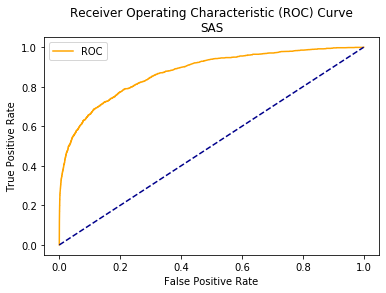

In [11]:
FPR, TPR, thresholds = roc_curve(data.isFraud, data.sas_pred)

def plot_roc_curve(FPR, TPR):
    plt.plot(FPR, TPR, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve\nSAS')
    plt.legend()
    plt.show()

plot_roc_curve(FPR, TPR)


# **XG Boost**

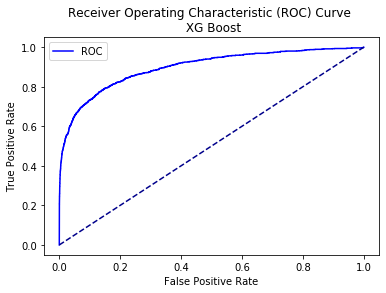

In [12]:
fpr, tpr, thresholds = roc_curve(data.isFraud, data.xgboost_pred)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='blue', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve \n XG Boost')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

# **ROC Layered**

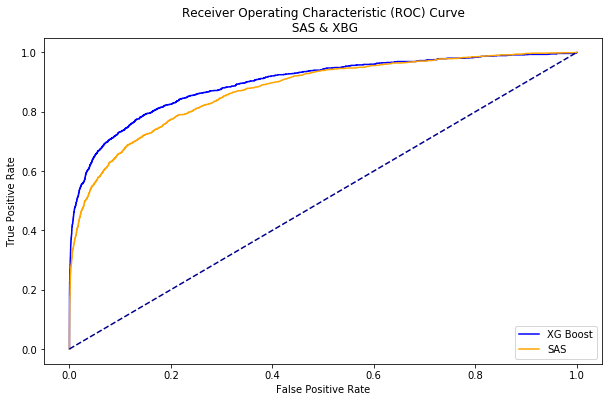

In [13]:
plt.figure(figsize=(10,6))

FPR, TPR, thresholds = roc_curve(data.isFraud, data.sas_pred)
fpr, tpr, thresholds = roc_curve(data.isFraud, data.xgboost_pred)

def plot_roc_curve(FPR, TPR, fpr, tpr):
    plt.plot(fpr, tpr, color='blue', label='XG Boost')
    plt.plot(FPR, TPR, color = 'orange', label = "SAS")
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve\n SAS & XBG')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(FPR, TPR, fpr, tpr)


_________________________________________

# **Results**

# SAS

In [14]:
print("SAS Report\n")
print('roc_auc_score: %0.3f'% roc_auc_score(data.isFraud, data.sas_predicted))
print("----------------------------------------------------------------------")
print("SAS", classification_report(data.isFraud, data.sas_predicted))
print("----------------------------------------------------------------------")
print("Confusion matrix \n",confusion_matrix(data.isFraud, data.sas_predicted))

SAS Report

roc_auc_score: 0.623
----------------------------------------------------------------------
SAS               precision    recall  f1-score   support

           0       0.97      1.00      0.99     34193
           1       0.82      0.25      0.38      1240

    accuracy                           0.97     35433
   macro avg       0.90      0.62      0.68     35433
weighted avg       0.97      0.97      0.96     35433

----------------------------------------------------------------------
Confusion matrix 
 [[34126    67]
 [  933   307]]


# XG Boost

In [15]:
print("XG Boost Report\n")
print('roc_auc_score: %0.3f'% roc_auc_score(data.isFraud, data.xgboost_predicted))
print("----------------------------------------------------------------------")
print("XG Boost", classification_report(data.isFraud, data.xgboost_predicted))
print("----------------------------------------------------------------------")
print("Confusion matrix \n",confusion_matrix(data.isFraud, data.xgboost_predicted))

XG Boost Report

roc_auc_score: 0.675
----------------------------------------------------------------------
XG Boost               precision    recall  f1-score   support

           0       0.98      1.00      0.99     34193
           1       0.83      0.35      0.49      1240

    accuracy                           0.97     35433
   macro avg       0.91      0.67      0.74     35433
weighted avg       0.97      0.97      0.97     35433

----------------------------------------------------------------------
Confusion matrix 
 [[34106    87]
 [  804   436]]


______________________________

# Density Plots

In [16]:
data.head()

,Unnamed: 0,ID,sas_pred,TransactionID,xgboost_pred,isFraud,sas_predicted,xgboost_predicted
0,0,2987006,0.01276,2987006,0.009477,0,0,0
1,1,2987011,0.01111,2987011,0.011886,0,0,0
2,2,2987018,0.00869,2987018,0.003172,0,0,0
3,3,2987031,0.00848,2987031,0.006850,0,0,0
4,4,2987037,0.00825,2987037,0.002263,0,0,0


In [17]:
data = data.drop([
    'sas_predicted', 
    'xgboost_predicted', 
    'TransactionID', 
    'ID', 
    'Unnamed: 0'], axis = 1)

# SAS
- Filter TP 
- Filter FN

In [18]:
# SAS True Positive 
sas_true_pos = data[(data['sas_pred'] >= 0.5000000) & (data['isFraud'] == 1 )]
print(sas_true_pos.isFraud.value_counts())

1    307
Name: isFraud, dtype: int64


In [19]:
# SAS False Negative
sas_false_neg = data[(data['sas_pred'] <= 0.49999999999) & (data['isFraud'] == 1 )]
print(sas_false_neg.isFraud.value_counts())

1    933
Name: isFraud, dtype: int64


# XG Boost
- Filter TP
- Filter FN

In [20]:
# XGBoost True Positive 
xgb_true_pos = data[(data['xgboost_pred'] >= 0.5000000) & (data['isFraud'] == 1 )]
print(xgb_true_pos.isFraud.value_counts())

1    436
Name: isFraud, dtype: int64


In [21]:
# XGBoost False Negative
xgb_false_neg = data[(data['xgboost_pred'] <= 0.49999999999) & (data['isFraud'] == 1 )]
print(xgb_false_neg.isFraud.value_counts())

1    804
Name: isFraud, dtype: int64


# Plots
- XGB TP vs SAS FN
- SAS TP vs XBG FN

In [22]:
import seaborn as sns

Text(0.5, 1.0, 'XG-Boost True Positive &\n SAS False Negative')

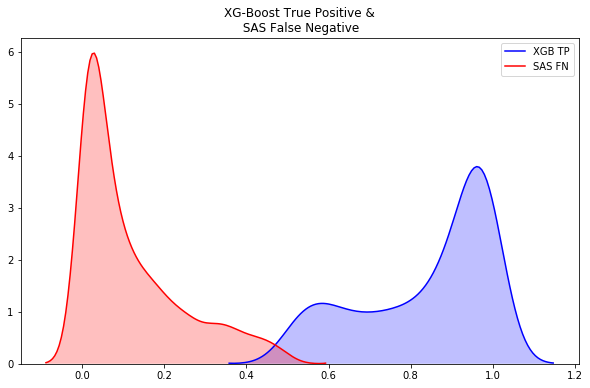

In [23]:
plt.figure(figsize = (10, 6))
XGB_TP= sns.kdeplot(xgb_true_pos['xgboost_pred'], shade = True, color = "b", label = 'XGB TP');
SAS_FN= sns.kdeplot(sas_false_neg['sas_pred'], shade = True, color = "r", label = 'SAS FN');
plt.title('XG-Boost True Positive &\n SAS False Negative')

Text(0.5, 1.0, 'XG-Boost False Negative &\n SAS True Positive')

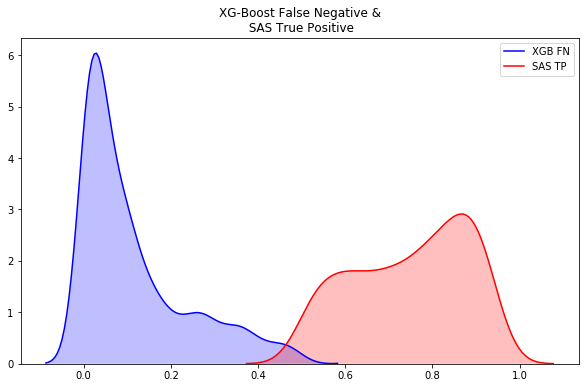

In [24]:
plt.figure(figsize = (10, 6))
XGB_FN= sns.kdeplot(xgb_false_neg['xgboost_pred'], shade = True, color = "b", label = 'XGB FN');
SAS_TP= sns.kdeplot(sas_true_pos['sas_pred'], shade = True, color = "r", label = 'SAS TP');
plt.title('XG-Boost False Negative &\n SAS True Positive')

Text(0.5, 1.0, 'XG-Boost & SAS \nFalse Negatives')

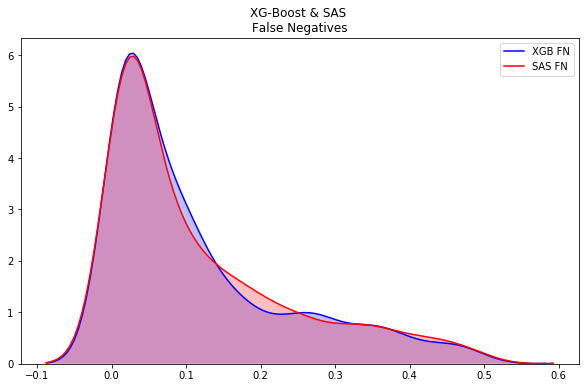

In [25]:
# False Negatives Comparison

plt.figure(figsize = (10,6))

XGB_FN= sns.kdeplot(xgb_false_neg['xgboost_pred'], shade = True, color = "b", label = 'XGB FN');
SAS_FN= sns.kdeplot(sas_false_neg['sas_pred'], shade = True, color = "r", label = 'SAS FN');
plt.title('XG-Boost & SAS \nFalse Negatives')

Text(0.5, 1.0, 'XG-Boost & SAS\n True Positive')

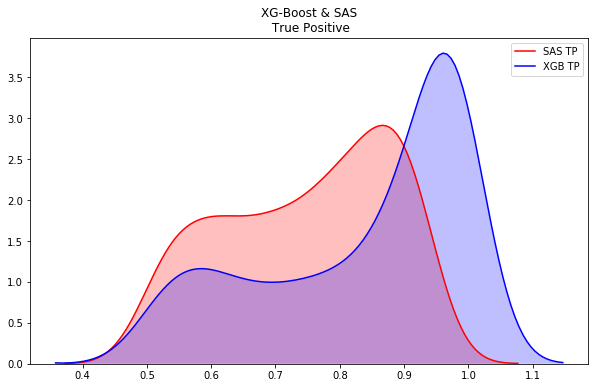

In [26]:
# True Positives Comparison
plt.figure(figsize = (10, 6))
SAS_TP= sns.kdeplot(sas_true_pos['sas_pred'], shade = True, color = "r", label = 'SAS TP');
XGB_TP= sns.kdeplot(xgb_true_pos['xgboost_pred'], shade = True, color = "b", label = 'XGB TP');
plt.title('XG-Boost & SAS\n True Positive')